## IMDB Box Office  - Barbenheimer Pt1

*Author - Olalekan Fagbuyi*

### Table of Contents

**1. Introduction**

**2. Importing Libraries and Loading Dataset**

**3. Data Cleaning and Exploratory Data Analysis (EDA)**

**4. Data Analysis**

**5. Conclusions**

### 1. Introduction

It is summertime again, that time of the year when we all troop to the cinema waiting for the next box office blockbuster release. The summer of 2023 created a new internet phenomenon called Barbenheimer when two of the year's most anticipated movies, Barbie and Oppenheimer, were released on the same day, Friday, 21st of July 2023. The simultaneous release of two movies targeting different demographics, known as counterprogramming, is not uncommon in Hollywood. However, the peculiarity of  Barbenheimer was that moviegoers planned to watch both, increasing the footfall and ticket sales at the cinemas. So far, opening weekend numbers for both movies have been Barbie (USD155mn) and Oppenheimer (USD80.5mn), making them the 25th and 113th highest first-week movie ticket sales ever.

A project idea emerged to capture the box office buzz that has taken over the internet all week. I decided to analyze the 1000 top box office movies ever with visualizations in Tableau. Also, a regression analysis will be run on Python to predict the total box office sales of moving from their first-week ticket sales.  

Data for this project was sourced from Box Office Mojo by [IMDBPro](https://www.boxofficemojo.com/chart/top_opening_weekend/) Movie details on the website were scrapped using the [ParseHub](https://www.parsehub.com/), a free web scraping tool and then saved as a CSV file. Data cleaning was carried out in Python.

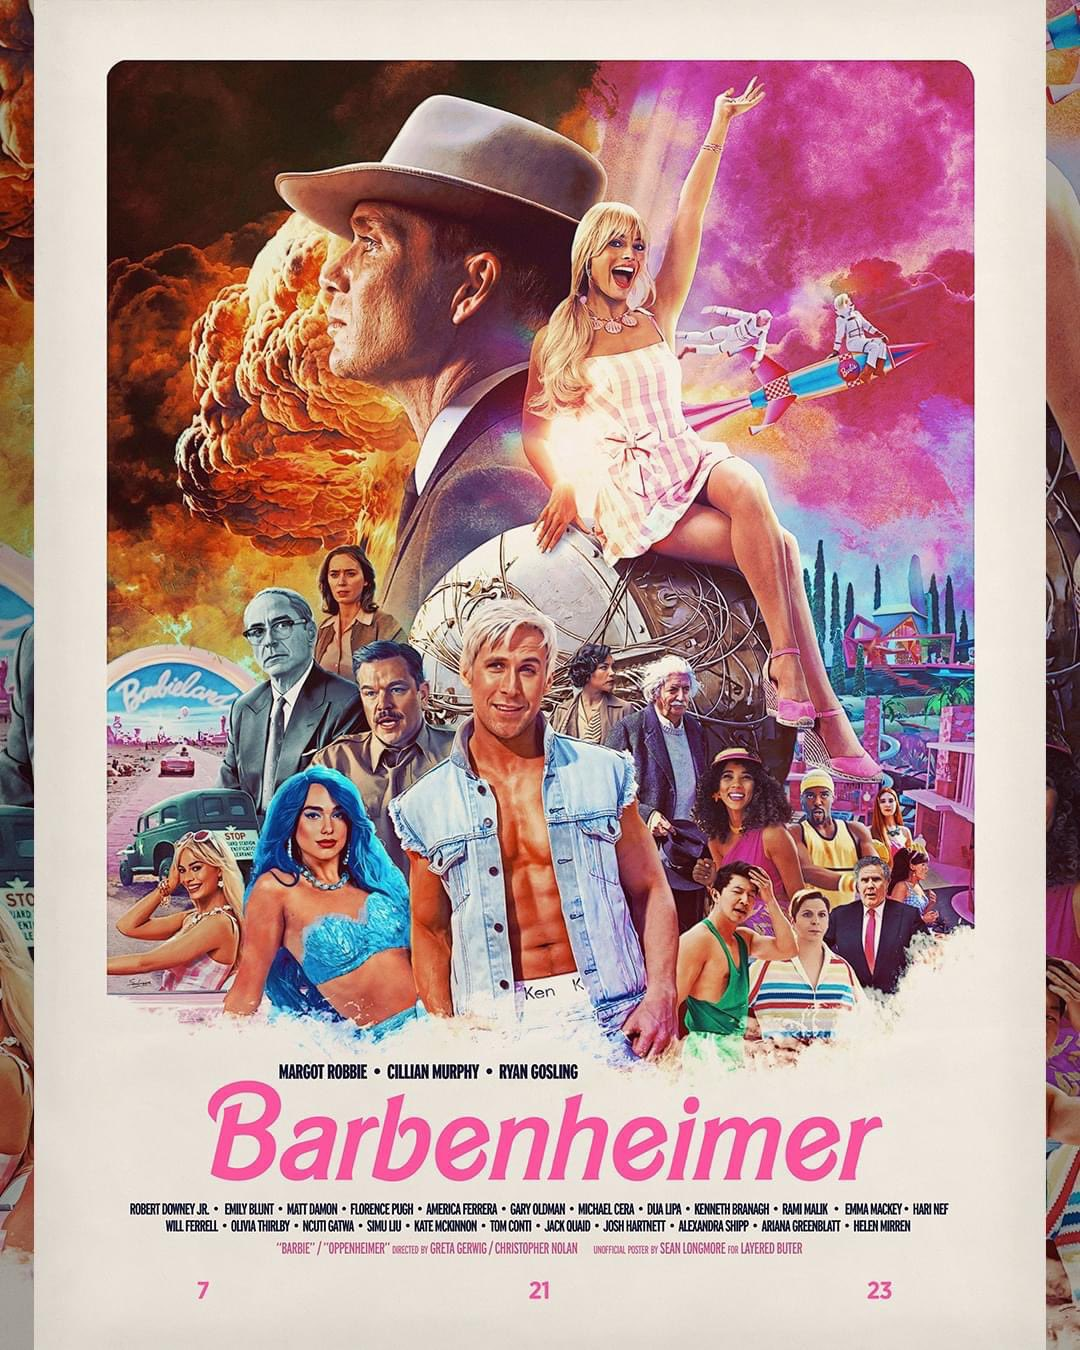

### 2. Importing Libraries and Loading Dataset

In [1]:
#Data Analysis
import pandas as pd
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, plot
from plotly.subplots import make_subplots
import plotly.express as px
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = "png"

#Notebook Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
box_office = pd.read_csv('C:\\Users\\User\\Documents\\Box_Office_Top1000_Movies_Raw.csv')

print(box_office.shape)
box_office.head()

(1004, 10)


,movie_title_name,movie_title_url,movie_title_opening_week,movie_title_total_gross,movie_title_first_week_pct,movie_title_cinemas,movie_title_opening_date,movie_title_opening_date_url,movie_title_distributor,movie_title_distributor_url
0,Avengers: Endgame,https://www.boxofficemojo.com/release/rl3059975681/?ref_=bo_csw_table_1,"$357,115,007","$858,373,000",41.60%,"4,662",26-Apr-19,https://www.boxofficemojo.com/date/2019-04-26/?ref_=bo_csw_table_1,Walt Disney Studios Motion Pictures,https://pro.imdb.com/company/co0226183/boxoffice/?view=releases&ref_=mojo_csw_table_1&rf=mojo_csw_table_1
1,Spider-Man: No Way Home,https://www.boxofficemojo.com/release/rl2869659137/?ref_=bo_csw_table_2,"$260,138,569","$804,793,477",32.30%,"4,336",17-Dec-21,https://www.boxofficemojo.com/date/2021-12-17/?ref_=bo_csw_table_2,Sony Pictures Entertainment (SPE),https://pro.imdb.com/company/co0026545/boxoffice/?view=releases&ref_=mojo_csw_table_2&rf=mojo_csw_table_2
2,Avengers: Infinity War,https://www.boxofficemojo.com/release/rl3043198465/?ref_=bo_csw_table_3,"$257,698,183","$678,815,482",38%,"4,474",27-Apr-18,https://www.boxofficemojo.com/date/2018-04-27/?ref_=bo_csw_table_3,Walt Disney Studios Motion Pictures,https://pro.imdb.com/company/co0226183/boxoffice/?view=releases&ref_=mojo_csw_table_3&rf=mojo_csw_table_3
3,Star Wars: Episode VII - The Force Awakens,https://www.boxofficemojo.com/release/rl2691925505/?ref_=bo_csw_table_4,"$247,966,675","$936,662,225",26.50%,"4,134",18-Dec-15,https://www.boxofficemojo.com/date/2015-12-18/?ref_=bo_csw_table_4,Walt Disney Studios Motion Pictures,https://pro.imdb.com/company/co0226183/boxoffice/?view=releases&ref_=mojo_csw_table_4&rf=mojo_csw_table_4
4,Star Wars: Episode VIII - The Last Jedi,https://www.boxofficemojo.com/release/rl2708702721/?ref_=bo_csw_table_5,"$220,009,584","$620,181,382",35.50%,"4,232",15-Dec-17,https://www.boxofficemojo.com/date/2017-12-15/?ref_=bo_csw_table_5,Walt Disney Studios Motion Pictures,https://pro.imdb.com/company/co0226183/boxoffice/?view=releases&ref_=mojo_csw_table_5&rf=mojo_csw_table_5


In [3]:
#checking for null values  and datatypes
box_office.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   movie_title_name              1004 non-null   object
 1   movie_title_url               1000 non-null   object
 2   movie_title_opening_week      1004 non-null   object
 3   movie_title_total_gross       1004 non-null   object
 4   movie_title_first_week_pct    1004 non-null   object
 5   movie_title_cinemas           1004 non-null   object
 6   movie_title_opening_date      1004 non-null   object
 7   movie_title_opening_date_url  1004 non-null   object
 8   movie_title_distributor       1002 non-null   object
 9   movie_title_distributor_url   1002 non-null   object
dtypes: object(10)
memory usage: 78.6+ KB


In [4]:
#Checking for duplicate values
print(box_office.duplicated().sum())

0


In [5]:
#Checking cardinality of all columns in the df using nunique() method. unique() method works for single columns
box_office.nunique()

movie_title_name                 993
movie_title_url                 1000
movie_title_opening_week        1000
movie_title_total_gross         1000
movie_title_first_week_pct       343
movie_title_cinemas              775
movie_title_opening_date         854
movie_title_opening_date_url     999
movie_title_distributor           31
movie_title_distributor_url      805
dtype: int64

### 3. Data Cleaning and EDA

This section will apply various pandas methods to clean columns from the dataframe to prepare the dataset for analysis.

##### 3.1 Deleting Unnecessary Columns

In [6]:
box_office.drop(['movie_title_url', 'movie_title_opening_date_url', 'movie_title_distributor_url'], axis = 1, inplace = True)

print(box_office.shape)
box_office.head()

(1004, 7)


,movie_title_name,movie_title_opening_week,movie_title_total_gross,movie_title_first_week_pct,movie_title_cinemas,movie_title_opening_date,movie_title_distributor
0,Avengers: Endgame,"$357,115,007","$858,373,000",41.60%,"4,662",26-Apr-19,Walt Disney Studios Motion Pictures
1,Spider-Man: No Way Home,"$260,138,569","$804,793,477",32.30%,"4,336",17-Dec-21,Sony Pictures Entertainment (SPE)
2,Avengers: Infinity War,"$257,698,183","$678,815,482",38%,"4,474",27-Apr-18,Walt Disney Studios Motion Pictures
3,Star Wars: Episode VII - The Force Awakens,"$247,966,675","$936,662,225",26.50%,"4,134",18-Dec-15,Walt Disney Studios Motion Pictures
4,Star Wars: Episode VIII - The Last Jedi,"$220,009,584","$620,181,382",35.50%,"4,232",15-Dec-17,Walt Disney Studios Motion Pictures


##### 3.2 Renaming Columns

In [7]:
#Get column names
list(box_office)

['movie_title_name',
 'movie_title_opening_week',
 'movie_title_total_gross',
 'movie_title_first_week_pct',
 'movie_title_cinemas',
 'movie_title_opening_date',
 'movie_title_distributor']

In [8]:
#Change to new column names
box_office.rename(columns = {'movie_title_name':'Movie_Title', 'movie_title_opening_week':'First_Week_Sales', 
                             'movie_title_total_gross' : 'Total_Ticket_Sales','movie_title_first_week_pct': 'First_Week_Pct',
                             'movie_title_cinemas' : 'No_of_Cinemas', 'movie_title_opening_date': 
                             'Opening_Date','movie_title_distributor': 'Distributor' }, inplace = True)
#Checking new column names
list(box_office)

['Movie_Title',
 'First_Week_Sales',
 'Total_Ticket_Sales',
 'First_Week_Pct',
 'No_of_Cinemas',
 'Opening_Date',
 'Distributor']

##### 3.3 Converting Columns to Correct Dtypes

In [9]:
#Stripping out the $ and , off First_Week and Total Sales columns sign then converting to int dtype
box_office['First_Week_Sales'] = box_office['First_Week_Sales'].str.replace(',', '').str.replace('$', '').astype(int)
box_office['Total_Ticket_Sales'] = box_office['Total_Ticket_Sales'].str.replace(',', '').str.replace('$', '').astype(int)

#Stripping % and , off First_Week_Pct and No_of_Cinemas column then converting dtype
box_office['No_of_Cinemas'] = box_office['No_of_Cinemas'].str.replace(',', '').astype(int)
box_office['First_Week_Pct'] = box_office['First_Week_Pct'].str.replace('%', '').astype(float)

#Converting Opening_Date to datetime format
box_office['Opening_Date'] = pd.to_datetime(box_office['Opening_Date'], format='%d-%b-%y')

In [10]:
#Checking for correctness of dtypes
box_office.dtypes

Movie_Title                   object
First_Week_Sales               int32
Total_Ticket_Sales             int32
First_Week_Pct               float64
No_of_Cinemas                  int32
Opening_Date          datetime64[ns]
Distributor                   object
dtype: object

##### 3.4 Feature Engineering

In [11]:
#Extracting datetime elements from Opening_Date Column
box_office['Opening_Year'] = box_office['Opening_Date'].dt.year
box_office['Opening_Month_Name'] = box_office['Opening_Date'].dt.month_name()
box_office['Opening_Month'] = box_office['Opening_Date'].dt.month
box_office['Opening_Day'] = box_office['Opening_Date'].dt.day_name()

In [12]:
box_office.head()

,Movie_Title,First_Week_Sales,Total_Ticket_Sales,First_Week_Pct,No_of_Cinemas,Opening_Date,Distributor,Opening_Year,Opening_Month_Name,Opening_Month,Opening_Day
0,Avengers: Endgame,357115007,858373000,41.6,4662,2019-04-26,Walt Disney Studios Motion Pictures,2019,April,4,Friday
1,Spider-Man: No Way Home,260138569,804793477,32.3,4336,2021-12-17,Sony Pictures Entertainment (SPE),2021,December,12,Friday
2,Avengers: Infinity War,257698183,678815482,38.0,4474,2018-04-27,Walt Disney Studios Motion Pictures,2018,April,4,Friday
3,Star Wars: Episode VII - The Force Awakens,247966675,936662225,26.5,4134,2015-12-18,Walt Disney Studios Motion Pictures,2015,December,12,Friday
4,Star Wars: Episode VIII - The Last Jedi,220009584,620181382,35.5,4232,2017-12-15,Walt Disney Studios Motion Pictures,2017,December,12,Friday


##### 3.5 Changing Distributor Names to Short Form

In this section, distributors names will be shortened, also subsidaries will be merged into the parent companies.

In [13]:
box_office['Distributor'].value_counts()

Warner Bros.                           169
Universal Pictures                     155
Walt Disney Studios Motion Pictures    149
Twentieth Century Fox                  131
Sony Pictures Entertainment (SPE)      105
Paramount Pictures                     105
Lionsgate                               45
DreamWorks                              22
Screen Gems                             20
New Line Cinema                         18
DreamWorks Distribution                 14
Metro-Goldwyn-Mayer (MGM)               11
Revolution Studios                      10
Summit Entertainment                     6
Dimension Films                          5
TriStar Pictures                         5
Miramax                                  4
Columbia Pictures                        4
The Weinstein Company                    3
20th Century Studios                     3
Relativity Media                         3
Focus Features                           3
United Artists Releasing                 2
FilmDistric

In [14]:
#Replacing
box_office = box_office.replace({'Distributor': {'Walt Disney Studios Motion Pictures': 'Walt Disney', 
                                                 'Sony Pictures Entertainment (SPE)': 'Sony Pictures',
                                                'DreamWorks Distribution': 'DreamWorks','New Line Cinema':'Warner Bros.',
                                               'Screen Gems':'Sony Pictures', 'Summit Entertainment':'Lionsgate',
                                                'TriStar Pictures':'Sony Pictures', 'Miramax':'Paramount Pictures',
                                                'Columbia Pictures': 'Sony Pictures', 'Twentieth Century Fox':'Walt Disney',
                                                '20th Century Studios': 'Walt Disney','Focus Features':'Universal Pictures',
                                                'Metro-Goldwyn-Mayer (MGM)':'MGM Amazon Prime', 
                                                 'United Artists Releasing' : 'MGM Amazon Prime','FilmDistrict':'Universal Pictures',
                                                 'United Artists': 'MGM Amazon Prime', 'Rogue Pictures': 'Relativity Media',
                                                'Dimension Films': 'The Weinstein Company'}})
box_office['Distributor'].value_counts()

Walt Disney                 283
Warner Bros.                187
Universal Pictures          160
Sony Pictures               134
Paramount Pictures          109
Lionsgate                    51
DreamWorks                   36
MGM Amazon Prime             14
Revolution Studios           10
The Weinstein Company         8
Relativity Media              4
STX Entertainment             2
Newmarket Films               1
FUNimation Entertainment      1
Crunchyroll                   1
Overture Films                1
Name: Distributor, dtype: int64

##### 3.6 Creating New Column

Distributors will be categorized into 2 groups.
1. Major Film Studios - Also known as The Big 5 in the industry
2. Others - Any movie studio not par of The Big 5

In [15]:
#The Pandas .map() method will be used to create the new Distributor_Category Column
distro_dict = {'Walt Disney': 'Major Studio', 'Warner Bros.': 'Major Studio', 'Universal Pictures': 'Major Studio', 
              'Sony Pictures': 'Major Studio', 'Paramount Pictures': 'Major Studio'}

box_office['Distributor_Category'] = box_office['Distributor'].map(distro_dict).fillna('Others')
box_office.head()

,Movie_Title,First_Week_Sales,Total_Ticket_Sales,First_Week_Pct,No_of_Cinemas,Opening_Date,Distributor,Opening_Year,Opening_Month_Name,Opening_Month,Opening_Day,Distributor_Category
0,Avengers: Endgame,357115007,858373000,41.6,4662,2019-04-26,Walt Disney,2019,April,4,Friday,Major Studio
1,Spider-Man: No Way Home,260138569,804793477,32.3,4336,2021-12-17,Sony Pictures,2021,December,12,Friday,Major Studio
2,Avengers: Infinity War,257698183,678815482,38.0,4474,2018-04-27,Walt Disney,2018,April,4,Friday,Major Studio
3,Star Wars: Episode VII - The Force Awakens,247966675,936662225,26.5,4134,2015-12-18,Walt Disney,2015,December,12,Friday,Major Studio
4,Star Wars: Episode VIII - The Last Jedi,220009584,620181382,35.5,4232,2017-12-15,Walt Disney,2017,December,12,Friday,Major Studio


In [16]:
top_movies = box_office[['Movie_Title', 'First_Week_Sales', 'Total_Ticket_Sales', 'First_Week_Pct', 'No_of_Cinemas',
                         'Distributor', 'Distributor_Category', 'Opening_Date', 'Opening_Year', 'Opening_Month_Name',
                         'Opening_Month', 'Opening_Day']]

print(top_movies.shape)
top_movies.head(10)

(1004, 12)


,Movie_Title,First_Week_Sales,Total_Ticket_Sales,First_Week_Pct,No_of_Cinemas,Distributor,Distributor_Category,Opening_Date,Opening_Year,Opening_Month_Name,Opening_Month,Opening_Day
0,Avengers: Endgame,357115007,858373000,41.6,4662,Walt Disney,Major Studio,2019-04-26,2019,April,4,Friday
1,Spider-Man: No Way Home,260138569,804793477,32.3,4336,Sony Pictures,Major Studio,2021-12-17,2021,December,12,Friday
2,Avengers: Infinity War,257698183,678815482,38.0,4474,Walt Disney,Major Studio,2018-04-27,2018,April,4,Friday
3,Star Wars: Episode VII - The Force Awakens,247966675,936662225,26.5,4134,Walt Disney,Major Studio,2015-12-18,2015,December,12,Friday
4,Star Wars: Episode VIII - The Last Jedi,220009584,620181382,35.5,4232,Walt Disney,Major Studio,2017-12-15,2017,December,12,Friday
5,Jurassic World,208806270,652270625,32.0,4274,Universal Pictures,Major Studio,2015-06-12,2015,June,6,Friday
6,The Avengers,207438708,623357910,33.3,4349,Walt Disney,Major Studio,2012-05-04,2012,May,5,Friday
7,Black Panther,202003951,700059566,28.9,4020,Walt Disney,Major Studio,2018-02-16,2018,February,2,Friday
8,The Lion King,191770759,543638043,35.3,4725,Walt Disney,Major Studio,2019-07-19,2019,July,7,Friday
9,Avengers: Age of Ultron,191271109,459005868,41.7,4276,Walt Disney,Major Studio,2015-05-01,2015,May,5,Friday


In [17]:
#Saving new df for further analysis
top_movies.to_csv('top_movies.csv', index = False)

#### 4. Data Analysis

This section will analyze the IMBD top box office dataset using Pandas methods and visualization libraries to generate insights. Each sub-section will answer a question that sheds light on different trends from the dataset.

In [18]:
top_movies.describe()

,First_Week_Sales,Total_Ticket_Sales,First_Week_Pct,No_of_Cinemas,Opening_Year,Opening_Month
count,1.004000e+03,1.004000e+03,1004.000000,1004.000000,1004.000000,1004.000000
mean,4.682779e+07,1.531836e+08,32.320418,3401.376494,2009.730080,6.684263
std,3.532779e+07,1.108326e+08,9.542743,610.152445,7.505787,3.134237
min,2.090583e+07,3.434194e+07,4.800000,683.000000,1983.000000,1.000000
25%,2.560140e+07,8.306541e+07,26.000000,3034.000000,2004.000000,4.000000
50%,3.412860e+07,1.190509e+08,31.800000,3422.000000,2010.000000,6.000000
75%,5.355116e+07,1.800111e+08,38.025000,3855.250000,2016.000000,9.000000
max,3.571150e+08,9.366622e+08,100.000000,4735.000000,2023.000000,12.000000


##### 4.1 Yearly Box Office Sales 

In [19]:
yearly_sales = top_movies.groupby((['Opening_Year']), as_index = False).agg(Ticket_Sales =('Total_Ticket_Sales', 'sum'),
                                                                           No_of_Movies = ('Movie_Title', 'count')) 
yearly_sales

,Opening_Year,Ticket_Sales,No_of_Movies
0,1983,252583617,1
1,1984,179870271,1
2,1987,153665036,1
3,1989,679305470,4
4,1990,475940428,4
5,1991,483839679,3
6,1992,563671531,4
7,1993,699292074,3
8,1994,907382581,6
9,1995,1102449049,9


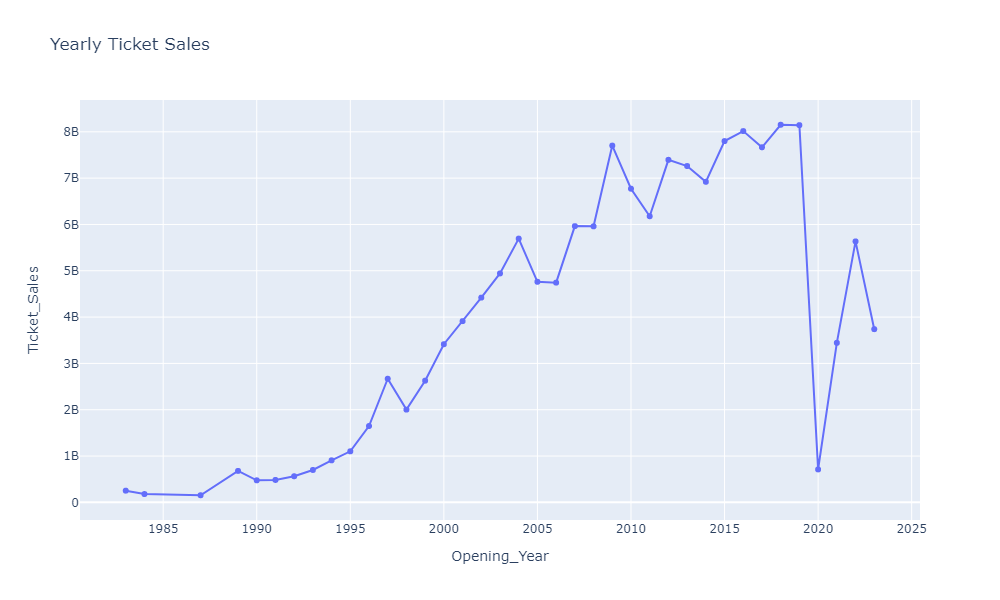

In [20]:
#visualizing year sales trend
fig = px.line(yearly_sales, x="Opening_Year", y="Ticket_Sales", title='Yearly Ticket Sales',
              markers =True, width=1000, height=600, )
fig.show()

##### 4.2 Distributor Analysis

In [21]:
#creating new df to group by distributors
distributors = top_movies.groupby(['Distributor','Distributor_Category'],
                                  as_index = False).agg(Ticket_Sales =('Total_Ticket_Sales', 'sum'),
                                                        No_of_Movies = ('Movie_Title', 'count')) 
distributors.head()

,Distributor,Distributor_Category,Ticket_Sales,No_of_Movies
0,Crunchyroll,Others,38112140,1
1,DreamWorks,Others,6393322539,36
2,FUNimation Entertainment,Others,49505008,1
3,Lionsgate,Others,6238827152,51
4,MGM Amazon Prime,Others,1577268510,14


In [22]:
#sorting distributors by ticket sales
top_distributors = distributors.sort_values('Ticket_Sales', ascending = False).reset_index(drop=True)

print(top_distributors[['Ticket_Sales', 'No_of_Movies']].sum())
top_distributors

Ticket_Sales    153647312903
No_of_Movies            1002
dtype: int64


,Distributor,Distributor_Category,Ticket_Sales,No_of_Movies
0,Walt Disney,Major Studio,52538561730,283
1,Warner Bros.,Major Studio,28667557385,187
2,Universal Pictures,Major Studio,22252696894,160
3,Sony Pictures,Major Studio,18058924964,134
4,Paramount Pictures,Major Studio,15077435641,109
5,DreamWorks,Others,6393322539,36
6,Lionsgate,Others,6238827152,51
7,MGM Amazon Prime,Others,1577268510,14
8,Revolution Studios,Others,929430377,10
9,The Weinstein Company,Others,886353743,8


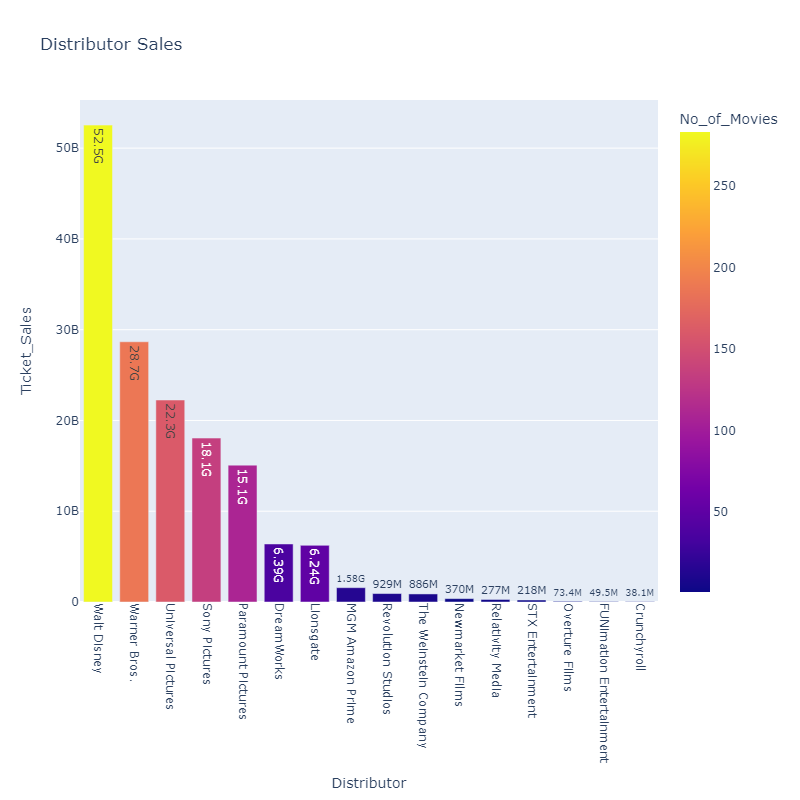

In [23]:
#visualizing distributor sales
fig = px.bar(top_distributors, x="Distributor", y="Ticket_Sales", title = 'Distributor Sales',
             color = 'No_of_Movies',width=800, height=800, text_auto='.3s')    

fig.update_xaxes(tickangle=90)
fig.show()

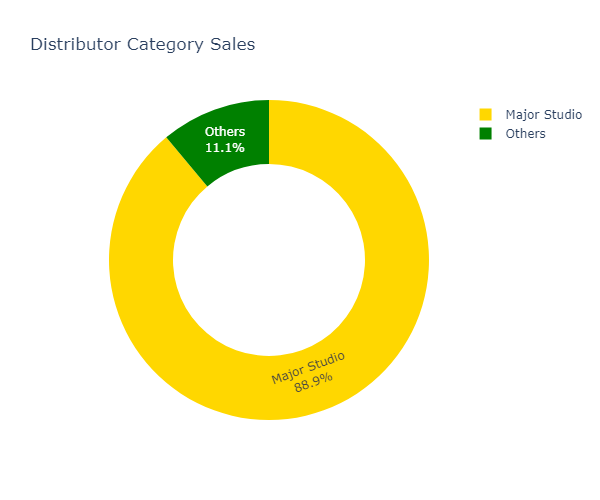

In [24]:
#vizualizing Ticket Sales by distributor category
fig = px.pie(top_distributors, values='Ticket_Sales', names='Distributor_Category',
             title='Distributor Category Sales', color = 'Distributor_Category',
             color_discrete_map ={'Major Studio': 'gold','Others':'green'},
             hover_data=['Distributor_Category'], width=600, height=500, hole = 0.6)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

##### 4.3 Top Grossing Movie Per Year

In [25]:
movies_by_year = top_movies.groupby(["Opening_Year"]).apply(lambda x: x.sort_values(["Total_Ticket_Sales"], 
                                                   ascending = False)).reset_index(drop = True)

print(movies_by_year.shape)
movies_by_year.head()

(1004, 12)


,Movie_Title,First_Week_Sales,Total_Ticket_Sales,First_Week_Pct,No_of_Cinemas,Distributor,Distributor_Category,Opening_Date,Opening_Year,Opening_Month_Name,Opening_Month,Opening_Day
0,Star Wars: Episode VI - Return of the Jedi,23019618,252583617,9.1,1002,Walt Disney,Major Studio,1983-05-25,1983,May,5,Wednesday
1,Indiana Jones and the Temple of Doom,25337110,179870271,14.1,1687,Paramount Pictures,Major Studio,1984-05-23,1984,May,5,Wednesday
2,Beverly Hills Cop II,26348555,153665036,17.2,2326,Paramount Pictures,Major Studio,1987-05-20,1987,May,5,Wednesday
3,Batman,40489746,251188924,16.1,2194,Warner Bros.,Major Studio,1989-06-23,1989,June,6,Friday
4,Indiana Jones and the Last Crusade,29355021,197171806,14.9,2327,Paramount Pictures,Major Studio,1989-05-24,1989,May,5,Wednesday


In [26]:
top_yearly_movie = movies_by_year.groupby('Opening_Year').head(1).reset_index(drop = True)

top_yearly_movie1 = top_yearly_movie[['Opening_Date','Opening_Month_Name','Movie_Title', 'Total_Ticket_Sales',
                                      'No_of_Cinemas', 'Distributor']]
top_yearly_movie1

,Opening_Date,Opening_Month_Name,Movie_Title,Total_Ticket_Sales,No_of_Cinemas,Distributor
0,1983-05-25,May,Star Wars: Episode VI - Return of the Jedi,252583617,1002,Walt Disney
1,1984-05-23,May,Indiana Jones and the Temple of Doom,179870271,1687,Paramount Pictures
2,1987-05-20,May,Beverly Hills Cop II,153665036,2326,Paramount Pictures
3,1989-06-23,June,Batman,251188924,2194,Warner Bros.
4,1990-03-30,March,Teenage Mutant Ninja Turtles,135265915,2006,Warner Bros.
5,1991-07-03,July,Terminator 2: Judgment Day,204843345,2274,Sony Pictures
6,1992-11-20,November,Home Alone 2: Lost in New York,173585516,2222,Walt Disney
7,1993-06-11,June,Jurassic Park,357067947,2404,Universal Pictures
8,1994-07-06,July,Forrest Gump,329694499,1595,Paramount Pictures
9,1995-11-22,November,Toy Story,191796233,2457,Walt Disney


In [27]:
#top selling movies by distributors
top_yearly_movie[['Distributor']].value_counts().rename_axis('Studio_Name').to_frame('No_of_Movies').reset_index()

,Studio_Name,No_of_Movies
0,Walt Disney,15
1,Warner Bros.,6
2,Paramount Pictures,5
3,Sony Pictures,5
4,Universal Pictures,3
5,DreamWorks,2
6,Lionsgate,2


In [28]:
#top selling movies by release month
top_yearly_movie[['Opening_Month_Name']].value_counts().rename_axis('Month').to_frame('No_of_Movies').reset_index()

,Month,No_of_Movies
0,May,10
1,December,7
2,July,7
3,November,6
4,June,3
5,April,2
6,February,1
7,January,1
8,March,1


##### 4.4 Popular Release Time

The most popular release period, months and days for movies are analyzed in this section. 

Movies released in the 7 films released in 2020 are excluded because COVID affected cinemas for the other months of the year. Also, movies for the from January to July of 2023 are not included because it adds more weight to this period in an incomplete year. 

In [29]:
top_movies2 = top_movies.query('(Opening_Year !=2020) and (Opening_Year != 2023)')

print(top_movies2.shape)
top_movies2.head()

(975, 12)


,Movie_Title,First_Week_Sales,Total_Ticket_Sales,First_Week_Pct,No_of_Cinemas,Distributor,Distributor_Category,Opening_Date,Opening_Year,Opening_Month_Name,Opening_Month,Opening_Day
0,Avengers: Endgame,357115007,858373000,41.6,4662,Walt Disney,Major Studio,2019-04-26,2019,April,4,Friday
1,Spider-Man: No Way Home,260138569,804793477,32.3,4336,Sony Pictures,Major Studio,2021-12-17,2021,December,12,Friday
2,Avengers: Infinity War,257698183,678815482,38.0,4474,Walt Disney,Major Studio,2018-04-27,2018,April,4,Friday
3,Star Wars: Episode VII - The Force Awakens,247966675,936662225,26.5,4134,Walt Disney,Major Studio,2015-12-18,2015,December,12,Friday
4,Star Wars: Episode VIII - The Last Jedi,220009584,620181382,35.5,4232,Walt Disney,Major Studio,2017-12-15,2017,December,12,Friday


In [30]:
monthly_sales = top_movies2.groupby(['Opening_Month_Name','Opening_Month'],as_index
                                   = False).agg(Ticket_Sales =('Total_Ticket_Sales',
                                                               'sum'),No_of_Movies = ('Movie_Title', 'count')) 

monthly_sales2 = monthly_sales.sort_values('Opening_Month', ascending = True).reset_index(drop=True)
monthly_sales2

,Opening_Month_Name,Opening_Month,Ticket_Sales,No_of_Movies
0,January,1,2780119099,32
1,February,2,7643038061,67
2,March,3,11361459345,83
3,April,4,7044015701,54
4,May,5,22258681104,109
5,June,6,22793229270,140
6,July,7,21151562153,128
7,August,8,8095621763,67
8,September,9,4920310820,50
9,October,10,6733881025,62


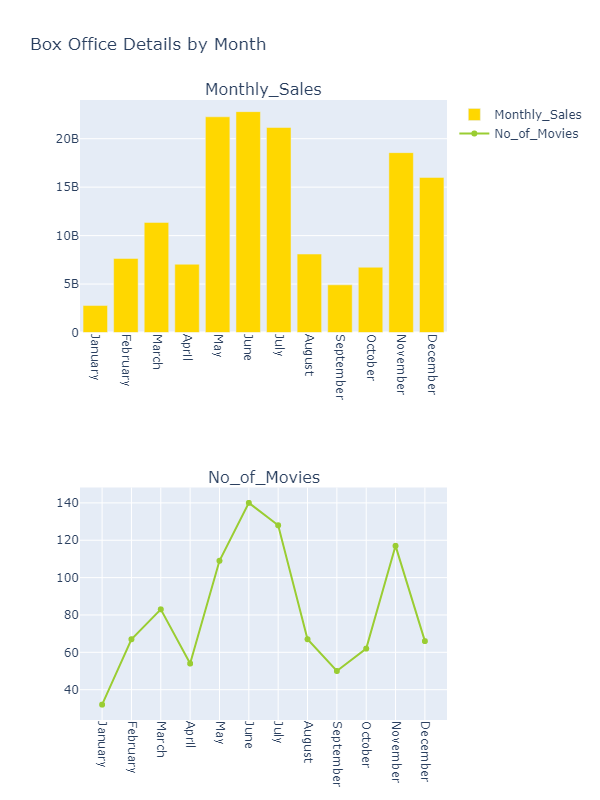

In [31]:
#set subplots layout
fig = make_subplots(rows=2, cols=1,subplot_titles=('Monthly_Sales', 'No_of_Movies'))

#Add plot traces
fig.add_trace(go.Bar(x=monthly_sales2['Opening_Month_Name'], y=monthly_sales2['Ticket_Sales'], name='Monthly_Sales',
                     marker=dict(color="gold")),row=1, col=1)

fig.add_trace(go.Scatter(x= monthly_sales2['Opening_Month_Name'],y=monthly_sales2['No_of_Movies'], name='No_of_Movies',  
                         marker=dict(color="yellowgreen")),row=2, col=1)

fig.update_layout(title = "Box Office Details by Month", width = 600, height=800, showlegend=True)

fig.update_xaxes(tickangle=90)
fig.show()

In [32]:
#top opening days
top_days = top_movies[['Opening_Day']].value_counts().rename_axis('Day').to_frame('No_of_Movies').reset_index()
top_days

,Day,No_of_Movies
0,Friday,873
1,Wednesday,102
2,Thursday,24
3,Tuesday,5


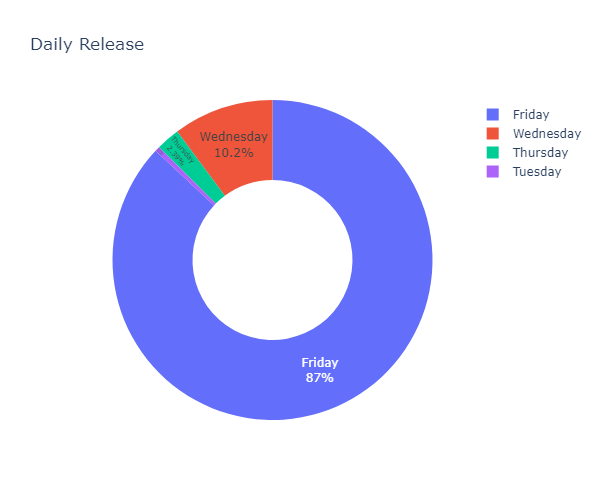

In [33]:
#player categories
fig = px.pie(top_days, values='No_of_Movies', names='Day',
             title='Daily Release',
             hover_data=['Day'], width=600, height=500, hole = 0.5)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

##### 4.5 Fastest and Slowest 1st Week Releases

In [34]:
#Fastest 10
fastest_first_week = top_movies2.nlargest(10, 'First_Week_Pct')[['Movie_Title', 'Total_Ticket_Sales','First_Week_Pct',
                                                                'Opening_Date', 'Distributor']].reset_index(drop=True)
fastest_first_week

,Movie_Title,Total_Ticket_Sales,First_Week_Pct,Opening_Date,Distributor
0,The Devil Inside,53261944,63.3,2012-01-06,Paramount Pictures
1,Texas Chainsaw,34341945,63.3,2013-01-04,Lionsgate
2,Halloween Ends,64079860,62.5,2022-10-14,Universal Pictures
3,Friday the 13th,65002019,62.4,2009-02-13,Warner Bros.
4,All Eyez on Me,44922302,58.8,2017-06-16,Lionsgate
5,Dragon Ball Super: Super Hero,38112140,55.4,2022-08-19,Crunchyroll
6,Mortal Kombat,42326031,55.0,2021-04-23,Warner Bros.
7,Paranormal Activity 4,53885000,53.8,2012-10-19,Paramount Pictures
8,Halloween Kills,92002155,53.7,2021-10-15,Universal Pictures
9,Saw V,56746769,53.0,2008-10-24,Lionsgate


In [35]:
#Slowest 10
slowest_first_week = top_movies2.nsmallest(10, 'First_Week_Pct')[['Movie_Title', 'Total_Ticket_Sales','First_Week_Pct',
                                                                'Opening_Date', 'Distributor']].reset_index(drop=True)
slowest_first_week

,Movie_Title,Total_Ticket_Sales,First_Week_Pct,Opening_Date,Distributor
0,Titanic,600683057,4.8,1997-12-19,Paramount Pictures
1,Forrest Gump,329694499,7.4,1994-07-06,Paramount Pictures
2,Jumanji: Welcome to the Jungle,404515480,8.9,2017-12-20,Sony Pictures
3,The Sixth Sense,293506292,9.1,1999-08-06,Walt Disney
4,Star Wars: Episode VI - Return of the Jedi,252583617,9.1,1983-05-25,Walt Disney
5,Avatar,749766139,10.3,2009-12-18,Walt Disney
6,Night at the Museum,250863268,12.1,2006-12-22,Walt Disney
7,Cast Away,233632142,12.4,2000-12-22,Walt Disney
8,The Fugitive,183875760,12.9,1993-08-06,Warner Bros.
9,Sing,270395425,13.0,2016-12-21,Universal Pictures


##### 4.6 Top 100 BoxOffice Movies

Extracting details of the top selling 100 movies at the box office.

In [36]:
top_100 = top_movies.nlargest(100, 'Total_Ticket_Sales')[['Movie_Title', 'Total_Ticket_Sales','Opening_Month_Name',
                                                          'Opening_Year','Distributor']].reset_index(drop=True)
top_100

,Movie_Title,Total_Ticket_Sales,Opening_Month_Name,Opening_Year,Distributor
0,Star Wars: Episode VII - The Force Awakens,936662225,December,2015,Walt Disney
1,Avengers: Endgame,858373000,April,2019,Walt Disney
2,Spider-Man: No Way Home,804793477,December,2021,Sony Pictures
3,Avatar,749766139,December,2009,Walt Disney
4,Top Gun: Maverick,718732821,May,2022,Paramount Pictures
5,Black Panther,700059566,February,2018,Walt Disney
6,Avatar: The Way of Water,684075767,December,2022,Walt Disney
7,Avengers: Infinity War,678815482,April,2018,Walt Disney
8,Jurassic World,652270625,June,2015,Universal Pictures
9,The Avengers,623357910,May,2012,Walt Disney


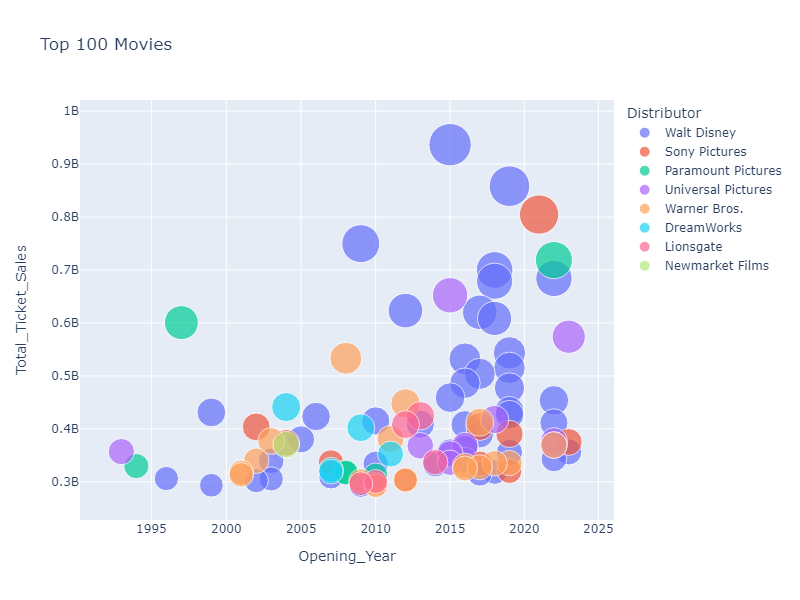

In [37]:
#visual display of movie details using a bubble chart.
fig = px.scatter(top_100, x="Opening_Year", y="Total_Ticket_Sales",size="Total_Ticket_Sales", color="Distributor",
                 hover_name="Movie_Title", title = 'Top 100 Movies',log_x=True, size_max=30, width=800, height=600)

fig.show()

### 5. Conclusion

Five critical insights generated from the first Analysis)
1. Ticket sales for the top 1000 box office movies grew steadily from USD252mn in 1983 to USD5.63bn in 2022 (8.3% CAGR). However, there was a sharp decline in 2020, with total ticket sales of USD710mn due to the pandemic. The peak years were 2018 and 2019, with sales of USD8.15bn and USD8.14bn, respectively, meaning sales are yet to return to pre-pandemic levels.

2. The absolute dominance of The Top 5 movie distributors, namely; **Walt Disney, Warner Bros, Universal Pictures, Sony Pictures and Paramount Pictures**, was noticed. These companies and their subsidiaries created 873 out of the top 1000 movies (almost 9 out of 10). They also contribute 88.9% (USD136.6bn) of the total USD153.64bn generated from these movies. 11 other studios make up the remaining 11%.
 
3. Some classic names appeared when filtering for the top-grossing movie of each year. Walt Disney was far ahead in this category creating 15 of the top movies in the 40 years under review. The next best studio was Warner Bros with 6.
            Top 80’s movie - Star Wars: Episode VI - Return of the Jedi (USD253mn in 1983)
            Top 90’s movie – Titanic (USD600mn in 1997)
            Top 2000’s movie – Avatar (USD750mn in 2009)
            Top 2010’s movie - Star Wars: Episode VII - The Last Jedi (USD937mn in 2015)
            Top 2020’s movie – Spider-Man: No Way Home (USD805mn in 2021)
           
   Still waiting for the first $1bn movie.


4. Popular movie release periods are the summer months of May (109), June (140), and July (128), then the start of the holiday season in November (117). 50% of movies are released in these 4 months. Then the most popular movie release day is Friday, with an overwhelming 87% of movies premiered at the start of the weekend.

5. There seems to be a magic formula to making big bucks at the box office, especially in the last 20 years. This formula is making movies based on **Sequels, Superheroes, and Animations**. A deep dive into the top selling 100 movies of all time shows over 72% of movies fall into one of these three categories. Walt Disney has been the king of milking its old content library by remaking big-money hits like Star Wars, Marvel Super Hero movies, and Toy Story, to mention a few. There is no need to fix what is not broken, I guess.

Thank you for reading.

Click on the links to follow me on [LinkedIN](https://www.linkedin.com/in/olalekan-fagbuyi-datascience/) and [GitHub](https://github.com/leks39)
